<h1>Higgins Bosson Event Detection</h1>
<hr>
<h2>Project 5</h2>
<hr>
<h3>Preprocessing</h3>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
#from autoviz import data_cleaning_suggestions

from utilerias import exact_values_table
from utilerias import missing_values_table
from utilerias import checking_skewness
from utilerias import plot_outliers
from utilerias import drop_outliers_IQR
from utilerias import impute_outliers_IQR

%matplotlib inline

<hr>
read the dataset
<hr>

In [2]:
df_bosson = pd.read_csv('../datasets/training_post_EDA.csv')

<hr>
Imputing missing values
<hr>

In [3]:
#remember, this time the missing values are those equal to -999
table = exact_values_table(df_bosson,-999)
table.style.background_gradient(cmap='Greens')

Sumary :
Columns     :33
f values :11


,f Values,% of Total Values
der_deltaeta_jet_jet,177457,71.000000
der_mass_jet_jet,177457,71.000000
der_prodeta_jet_jet,177457,71.000000
der_lep_eta_centrality,177457,71.000000
pri_jet_subleading_pt,177457,71.000000
pri_jet_subleading_eta,177457,71.000000
pri_jet_subleading_phi,177457,71.000000
pri_jet_leading_pt,99913,40.000000
pri_jet_leading_eta,99913,40.000000
pri_jet_leading_phi,99913,40.000000


Let's delete those features with 71% of uncalculated values

In [4]:
df_bosson.drop(table[table['% of Total Values']==71.0].index, axis=1, inplace=True)

In [5]:
#in order to inpute the new values I'm going to sustitute -999 by nan
df_bosson = df_bosson.replace(-999, np.nan)

In [6]:
#show the nan values
table = missing_values_table(df_bosson)
table.style.background_gradient(cmap='Reds')

Sumary :
Columns     :26
Null values :4


,Missing Values,% of Total Values
pri_jet_leading_pt,99913,40.000000
pri_jet_leading_eta,99913,40.000000
pri_jet_leading_phi,99913,40.000000
der_mass_mmc,38114,15.200000


In [7]:
#now I'm going to use KNN to impute those new nan values, for another ones
#knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
#for feature in table.index:
#    print(f'Imputing values for {feature}')
#    df_bosson[feature] = knn_imputer.fit_transform(df_bosson[[feature]])

##my computer seems to breaks everytime I wanna run this segment of code, so in order to keep working
#i'm gonna imputate by mean
df_bosson = df_bosson.fillna(df_bosson.mean())

/tmp/ipykernel_58011/572843237.py:9: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Let's check the result of imputation

In [8]:
#show the nan values
table = missing_values_table(df_bosson)
table.style.background_gradient(cmap='Reds')

Sumary :
Columns     :26
Null values :0


,Missing Values,% of Total Values


great, everything goes fine. 
<hr>
skewness
<hr>

In [9]:
table = checking_skewness(df_bosson)
table.style.background_gradient(cmap='Blues')

/home/hmorales/Cursos/TMLC/Higgs-Boson-Event_Detection/notebooks/utilerias.py:109: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/home/hmorales/Cursos/TMLC/Higgs-Boson-Event_Detection/notebooks/utilerias.py:110: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,skewness,kurtosis
der_pt_tot,10.600000,1036.500000
pri_met,5.300000,227.300000
der_mass_mmc,4.100000,33.300000
der_mass_vis,3.800000,35.500000
pri_tau_pt,3.800000,30.500000
pri_jet_leading_pt,3.300000,19.600000
pri_lep_pt,3.200000,21.600000
der_pt_ratio_lep_tau,2.600000,18.300000
der_pt_h,2.500000,22.000000
pri_jet_all_pt,2.400000,9.900000


<hr>
Indentifying Outliers
<hr>

Acording to the skewness rank, let's plot those numeric features, higher than 3.

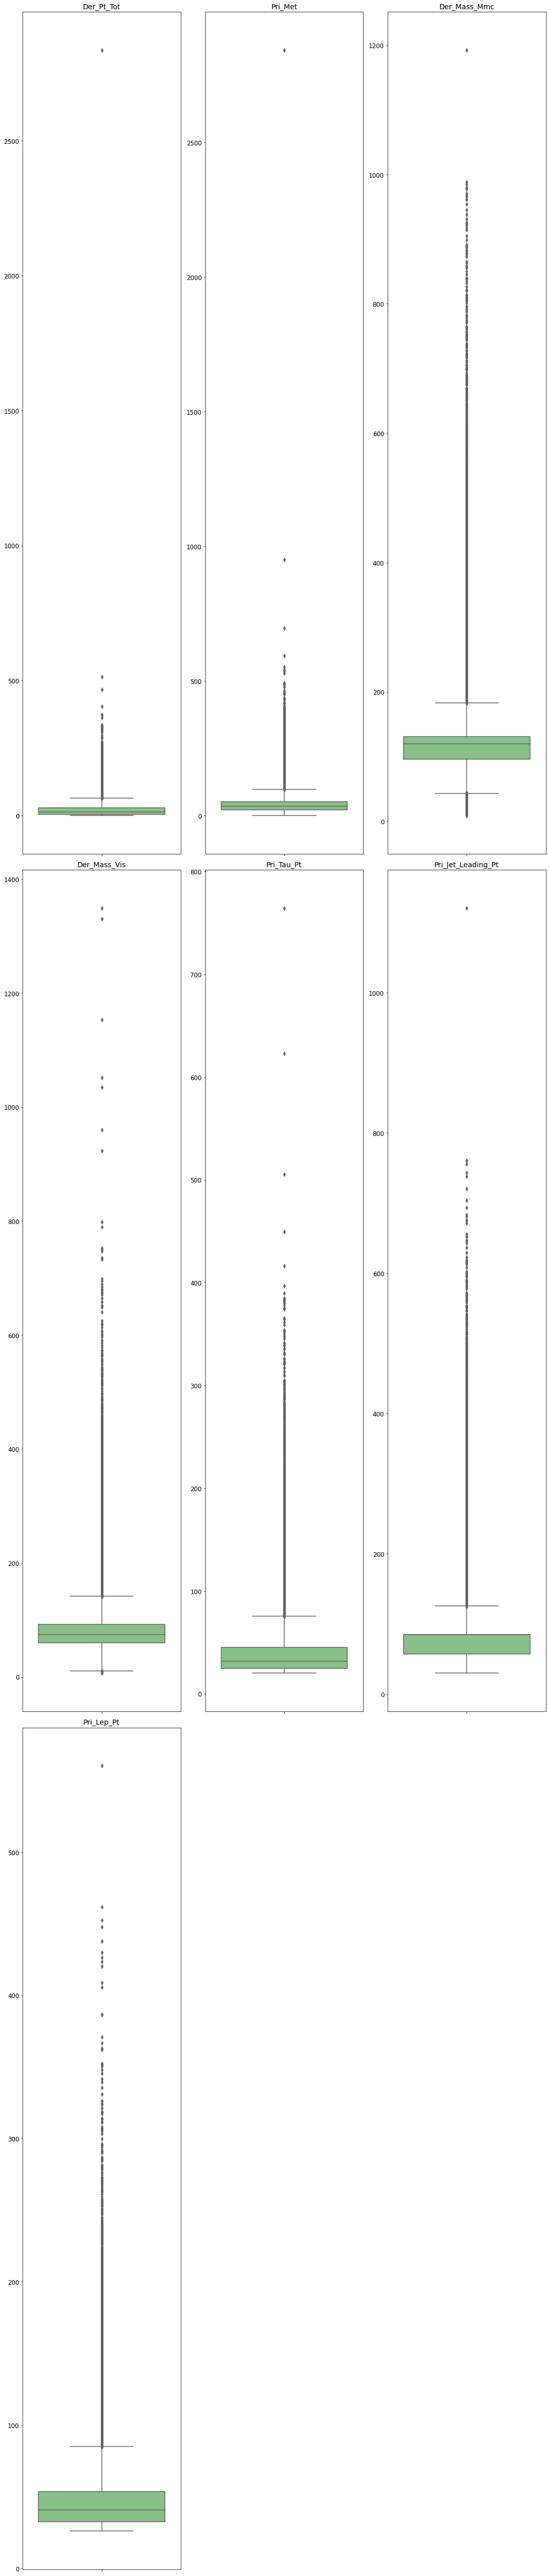

In [19]:
plot_outliers(df_bosson[table[table['skewness']>=3.0].index])


how many entries mean those outliers?

drop all the outliers from the data, excluding them from the analysis and modeling

In [10]:
df_bosson_to_erase = drop_outliers_IQR(df_bosson,df_bosson[table[table['skewness']>=3.0].index])

In [11]:
df_bosson_to_erase

,eventid,der_mass_mmc,der_mass_transverse_met_lep,der_mass_vis,der_pt_h,der_deltar_tau_lep,der_pt_tot,der_sum_pt,der_pt_ratio_lep_tau,der_met_phi_centrality,...,pri_met,pri_met_phi,pri_met_sumet,pri_jet_num,pri_jet_leading_pt,pri_jet_leading_eta,pri_jet_leading_phi,pri_jet_all_pt,weight,label
45,100045,27.788000,68.032,23.530,33.375,0.780,10.201,132.965,1.373,-0.776,...,32.195,-0.498,233.334,2,37.734000,2.663000,-0.491000,70.400,1.916554,b
195,100195,35.070000,83.831,30.425,36.406,0.922,2.856,106.152,2.223,-0.423,...,37.576,1.200,156.546,1,36.933000,-3.051000,0.510000,36.933,2.339817,b
287,100287,18.614000,104.884,15.073,139.622,0.267,11.362,311.058,5.725,-0.044,...,23.854,2.578,212.458,2,91.241000,1.322000,-2.519000,154.730,2.362855,b
445,100445,26.564000,1.014,18.130,96.480,0.478,0.278,173.164,1.381,1.091,...,21.334,2.022,209.234,1,96.525000,2.036000,-1.023000,96.525,2.029290,b
602,100602,37.295000,46.750,32.620,19.448,1.294,19.448,54.069,0.959,-1.397,...,23.987,0.986,66.646,0,84.822105,-0.003275,-0.012393,-0.000,4.166042,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175315,275315,10.499000,58.933,7.520,35.174,0.264,42.089,135.835,1.772,-0.976,...,23.189,0.151,139.231,1,77.258000,1.502000,0.313000,77.258,0.018636,s
186050,286050,11.160000,94.152,9.463,40.376,0.256,3.034,215.784,2.356,-0.193,...,39.726,0.963,196.452,2,74.164000,-2.875000,0.227000,136.131,2.205355,b
207485,307485,10.274000,75.262,9.281,66.821,0.322,34.437,117.058,1.917,-0.007,...,54.207,2.768,208.941,1,57.173000,0.420000,-0.848000,57.173,2.147104,b
218989,318989,121.858528,75.237,9.507,21.462,0.409,21.462,46.601,1.318,-0.410,...,54.494,-2.586,100.474,0,84.822105,-0.003275,-0.012393,0.000,2.009110,b


In [11]:
print ('Comparing sizes before and after')
print ('================================')
print (f'Afer   {df_bosson.shape}')
print (f'Before {df_bosson_new.shape}')

Comparing sizes before and after
Afer   (250000, 26)
Before (86494, 26)


so much records where deleted! it doesn't seem right, let's impute them with max or min values instead

In [13]:
df_bosson_new = impute_outliers_IQR(df_bosson)

/home/hmorales/Cursos/TMLC/Higgs-Boson-Event_Detection/notebooks/utilerias.py:167: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`

/home/hmorales/Cursos/TMLC/Higgs-Boson-Event_Detection/notebooks/utilerias.py:168: FutureWarning:

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`

/home/hmorales/Cursos/TMLC/Higgs-Boson-Event_Detection/notebooks/utilerias.py:169: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/home/hmorales/Cursos/TMLC/Higgs-Boson-Event_Detection/notebooks/utilerias.py:170: FutureWarning:

ValueError: operands could not be broadcast together with shapes (250000,26) (25,) (250000,26) 